In [1]:
%matplotlib inline
from pylab import *

In [2]:

def make_training_squares(filefilter,shape,locations=None):
    from glob import glob
    import os
    import json
    
    if locations is None:
        with open('locations.json') as json_file:
            locations = json.load(json_file)        
    
    fnames=glob(filefilter)
    arr=array(imread(fnames[0]))
    for location in locations:
        c,r=location
        c1=int(c-shape[1]/2)
        c2=int(c+shape[1]/2)
        r1=int(r-shape[0]/2)
        r2=int(r+shape[0]/2)

        c2=c2+(shape[1]-(c2-c1))
        r2=r2+(shape[0]-(r2-r1))

        arr[r1:r2,c1:c2,:]=arr[r1:r2,c1:c2,:]+100
        

    clf()
    imshow(arr)
    base,name=os.path.split(fnames[0])
    newdirname=base+"/squares"
    if not os.path.exists(newdirname):
        os.mkdir(newdirname)
    
    for fname in fnames:
        arr=array(imread(fname))
        base,name=os.path.split(fname)
        base,ext=os.path.splitext(name)
        for i,location in enumerate(locations):
            c,r=location
            c1=int(c-shape[1]/2)
            c2=int(c+shape[1]/2)
            r1=int(r-shape[0]/2)
            r2=int(r+shape[0]/2)

            c2=c2+(shape[1]-(c2-c1))
            r2=r2+(shape[0]-(r2-r1))

            if (r2>arr.shape[0]) or (r1<0) or (c2>arr.shape[1]) or (c1<0):
                raise IndexError('Square size out of bounds of image.')
            
            square=arr[r1:r2,c1:c2,:]
            
            newfname=base+"_%d" %(i) + ext
            print(newdirname+"/"+newfname)
            imsave(newdirname+"/"+newfname,square)

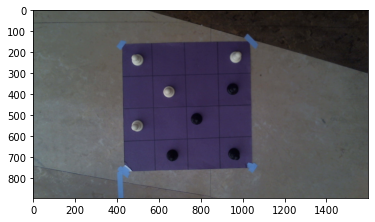

In [4]:
im=imread('RotoPhotos2/board2.jpg')
imshow(im)

RotoPhotos2/squares/board6_0.jpg
RotoPhotos2/squares/board6_1.jpg
RotoPhotos2/squares/board6_2.jpg
RotoPhotos2/squares/board6_3.jpg
RotoPhotos2/squares/board6_4.jpg
RotoPhotos2/squares/board6_5.jpg
RotoPhotos2/squares/board6_6.jpg
RotoPhotos2/squares/board6_7.jpg
RotoPhotos2/squares/board6_8.jpg
RotoPhotos2/squares/board6_9.jpg
RotoPhotos2/squares/board6_10.jpg
RotoPhotos2/squares/board6_11.jpg
RotoPhotos2/squares/board6_12.jpg
RotoPhotos2/squares/board6_13.jpg
RotoPhotos2/squares/board6_14.jpg
RotoPhotos2/squares/board6_15.jpg
RotoPhotos2/squares/board2_0.jpg
RotoPhotos2/squares/board2_1.jpg
RotoPhotos2/squares/board2_2.jpg
RotoPhotos2/squares/board2_3.jpg
RotoPhotos2/squares/board2_4.jpg
RotoPhotos2/squares/board2_5.jpg
RotoPhotos2/squares/board2_6.jpg
RotoPhotos2/squares/board2_7.jpg
RotoPhotos2/squares/board2_8.jpg
RotoPhotos2/squares/board2_9.jpg
RotoPhotos2/squares/board2_10.jpg
RotoPhotos2/squares/board2_11.jpg
RotoPhotos2/squares/board2_12.jpg
RotoPhotos2/squares/board2_13.jpg


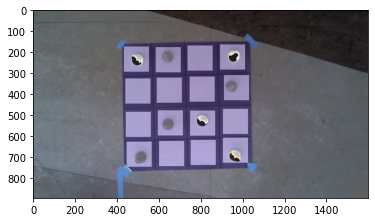

In [5]:
make_training_squares("RotoPhotos2/*.jpg",
                      (120,120))